Using OpenCV or NLTK kind of library to read text (OCR) from it and categories all images in the categories like Home utility, Grocery, Shopping, Vehicle expenditure, Entertainment and Investment. 
1. Extract the text from the images and store it in categorical wise CSV file. Each category 
have separate CSV file.
2. Each CSV file store the information like date of bill, organization name which generate 
the bill, bill amount and tax information(if any). 
3. Show table which is showing the expenses details category wise and display them in 
pie chart.
4. Give suggestion to user, based on his expenditure which lead to increase the saving. 



In [1]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet 

For the general program flow we have elaborated the model in the below block.

here is demo of one bill that is scaned.We downloaded few bills from internet as those category bills were not available at home.

In [2]:
#Part one
#lets read an image
image=cv2.imread('bill3.png',0)


In [3]:
#convert it into text
text=(pytesseract.image_to_string(image)).lower()
print(text)

ying thai kitchen
2220 queen anne ave n
seattle wa 98109
« (206) 285-8424 fax. (206) 285-8427
‘uw .yingthaikitchen.com
welcome to ying thai kitchen restaurant.

order#:17 table 2
date: 7/4/2013 7:28 pm

server: jack (1.4)
44 ginger lover $9.50
[pork] [24#]

brown rice $2.00
total 2 iten(s) $11.50
sales tax $1.09
grand total $12.59
tip guide

tek=$1.89, 18%=$2.27, 20%=82.52
thank you very much,
cone back again



In [4]:
#identify the date

match=re.findall(r'\d+[/.-]\d+[/.-]\d+', text)

st=" "
st=st.join(match)
print(st)

7/4/2013


In [5]:
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)

True

In [6]:
#lets try to extract title
sent_tokens=nltk.sent_tokenize(text)
#print(sent_tokens)
sent_tokens[0].splitlines()[0]
#print(sent_tokens[0].splitlines()[0])
head=sent_tokens[0].splitlines()[0]
print(head)


ying thai kitchen


In [7]:
#lets find the price of the category.
price=re.findall(r'[\$\£\€](\d+(?:\.\d{1,2})?)',text)
price = list(map(float,price)) 
print(max(price))
x=max(price)  

12.59


output:
12.59

In [8]:
#till here we have extracted date,title and amount.
#now its time to categorise bill whether it is shopping or grocery like wise
#so i will first tokenise the text and search for key words
print(word_tokenize(text))

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '«', '(', '206', ')', '285-8424', 'fax', '.', '(', '206', ')', '285-8427', '‘', 'uw', '.yingthaikitchen.com', 'welcome', 'to', 'ying', 'thai', 'kitchen', 'restaurant', '.', 'order', '#', ':17', 'table', '2', 'date', ':', '7/4/2013', '7:28', 'pm', 'server', ':', 'jack', '(', '1.4', ')', '44', 'ginger', 'lover', '$', '9.50', '[', 'pork', ']', '[', '24', '#', ']', 'brown', 'rice', '$', '2.00', 'total', '2', 'iten', '(', 's', ')', '$', '11.50', 'sales', 'tax', '$', '1.09', 'grand', 'total', '$', '12.59', 'tip', 'guide', 'tek=', '$', '1.89', ',', '18', '%', '=', '$', '2.27', ',', '20', '%', '=82.52', 'thank', 'you', 'very', 'much', ',', 'cone', 'back', 'again']


In [9]:
#we will remove punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(text)
print(new_words)

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '206', '285', '8424', 'fax', '206', '285', '8427', 'uw', 'yingthaikitchen', 'com', 'welcome', 'to', 'ying', 'thai', 'kitchen', 'restaurant', 'order', '17', 'table', '2', 'date', '7', '4', '2013', '7', '28', 'pm', 'server', 'jack', '1', '4', '44', 'ginger', 'lover', '9', '50', 'pork', '24', 'brown', 'rice', '2', '00', 'total', '2', 'iten', 's', '11', '50', 'sales', 'tax', '1', '09', 'grand', 'total', '12', '59', 'tip', 'guide', 'tek', '1', '89', '18', '2', '27', '20', '82', '52', 'thank', 'you', 'very', 'much', 'cone', 'back', 'again']


In [10]:
#stop_words = set(nltk.corpus.stopwords.words('english')) 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
#there are stop words like a ,an,the etc which are not required
#so we need to filter them
stop_words = set(nltk.corpus.stopwords.words('english')) 

In [12]:
#there is the filetred list
filtered_list=[w for w in new_words if w not in stop_words ]
print(filtered_list)

['ying', 'thai', 'kitchen', '2220', 'queen', 'anne', 'ave', 'n', 'seattle', 'wa', '98109', '206', '285', '8424', 'fax', '206', '285', '8427', 'uw', 'yingthaikitchen', 'com', 'welcome', 'ying', 'thai', 'kitchen', 'restaurant', 'order', '17', 'table', '2', 'date', '7', '4', '2013', '7', '28', 'pm', 'server', 'jack', '1', '4', '44', 'ginger', 'lover', '9', '50', 'pork', '24', 'brown', 'rice', '2', '00', 'total', '2', 'iten', '11', '50', 'sales', 'tax', '1', '09', 'grand', 'total', '12', '59', 'tip', 'guide', 'tek', '1', '89', '18', '2', '27', '20', '82', '52', 'thank', 'much', 'cone', 'back']


in the next six blocks we will make list of 6 categories.these list will contain few words which are relatable to the category of bill.for instance suppose the above bill of the restuarant would include words like kitchen,food or restuarant.so we will compare it list category and likewise allot the rescpective category.

In [13]:
#entertainment
entertainment = [] 
for syn in wordnet.synsets("entertainment"): 
    for l in syn.lemmas(): 
        entertainment.append(l.name()) 
        
l=['happy','restaurant','food','kitchen','hotel','room','park','movie','cinema','popcorn','combo meal']
entertainment=entertainment+l


In [14]:
#home utility
home_utility=[] 
for syn in wordnet.synsets("home"): 
    for l in syn.lemmas(): 
         home_utility.append(l.name()) 
l2=['internet','telephone','elecricity','meter','wifi','broadband','consumer','reading','gas','water','postpaid','prepaid']
home_utility+=l2

In [15]:
#grocery
 
grocery=[] 
for syn in wordnet.synsets("grocery"): 
    for l in syn.lemmas(): 
         grocery.append(l.name())
l3=['bigbasket','milk','atta','sugar','suflower','oil','bread','vegetabe','fruit','salt','paneer']
grocery+=l3


In [16]:
#investment
investment=[] 
for syn in wordnet.synsets("investment"): 
    for l in syn.lemmas(): 
         investment.append(l.name()) 
l1=['endowment','grant','loan','applicant','income','expenditure','profit','interest','expense','finance','property','money','fixed','deposit','kissan','vikas']
investment=investment+l1

In [17]:
#travel and transportation
transport=[]
for syn in wordnet.synsets("car"): 
    for l in syn.lemmas(): 
         transport.append(l.name()) 
l4=['cab','ola','uber','autorickshaw','railway','air','emirates','aerofloat','taxi','booking','road','highway']
transport+=l4

In [18]:
#shopping
shopping=[]
for syn in wordnet.synsets("dress"): 
    for l in syn.lemmas(): 
         shopping.append(l.name()) 
l4=['iphone','laptop','saree','max','pantaloons','westside','vedic','makeup','lipstick','cosmetics','mac','facewash','heels','crocs','footwear','purse']
shopping+=l4

In [19]:
#here we will check that the bill belongs to which category
#we will make that category true.
for word in filtered_list:
    if word in entertainment:
        e=True
        break
    elif word in investment:
        inv=True
        break
    elif word in grocery:
        g=True
        break
    elif word in shopping:
        s=True
        break
    elif word in transport:
        t=True
        break
    elif word in home_utility:
        h=True
        break
            

In [20]:
'''
#this is how i created all the csv files.
with open('entertainment.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])
with open('investment.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount']) 
with open('shopping.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])
with open('grocery.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])
with open('transport.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])
with open('home.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])
with open('others.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])
'''
   

"\n#this is how i created all the csv files.\nwith open('entertainment.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','organisation','amount'])\nwith open('investment.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','organisation','amount']) \nwith open('shopping.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','organisation','amount'])\nwith open('grocery.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','organisation','amount'])\nwith open('transport.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','or

In [21]:
#question 2
#this code the category in which the bill belongs to
#if e is true then entertainment categrory and we will ,ake filename as entertainment.csv using
#formatting
if(e):
    print("entertainment category")
    filename='{}.csv'.format('entertainment')
    df=pd.read_csv('entertainment.csv')
elif(inv):
    print("investment category")
    filename='{}.csv'.format('investment')
    #df=pd.read_csv('investment.csv')
elif(s):
    print("shopping category")
    filename='{}.csv'.format('shopping')
    #df=pd.read_csv('shopping.csv')
elif(g):
    print("grocery category")
    filename='{}.csv'.format('grocery')
    #df=pd.read_csv('grocery.csv')
elif(t):
    print("transport category")
    filename='{}.csv'.format('transport')
    #df=pd.read_csv('transport.csv')
elif(h):
    print("home utility category")
    filename='{}.csv'.format('home')
    #df=pd.read_csv('home.csv')
else:
    print("others")
    filename='{}.csv'.format('others')
    #df=pd.read_csv('others.csv')
        
        


entertainment category


In [22]:
#add the contents in thier respective csv file
row_contents = ([st,head,x])
from csv import writer
 
def append_list_as_row(file, list_of_elem):
   
    with open(file, 'a+', newline='') as write_obj:
       
        csv_writer = writer(write_obj)
        
        csv_writer.writerow(list_of_elem)
append_list_as_row(filename, row_contents)

In [23]:
#after this make sure you save it
entertainment=pd.read_csv('entertainment.csv')
investment=pd.read_csv('investment.csv')
shopping=pd.read_csv('shopping.csv')
grocery=pd.read_csv('grocery.csv')
transport=pd.read_csv('transport.csv')
other=pd.read_csv('others.csv')
home=pd.read_csv('home.csv')

In [24]:
entertainment['Date']= pd.to_datetime(entertainment.date)
investment['Date']=pd.to_datetime(investment.date)
shopping['Date']=pd.to_datetime(shopping.date)
grocery['Date']=pd.to_datetime(grocery.date)
transport['Date']=pd.to_datetime(transport.date)
other['Date']=pd.to_datetime(other.date)
home['Date']=pd.to_datetime(home.date)


In [25]:
#question3
entertainment.head()

,date,organisation,amount,Date
0,1/7/2017,sri krishna,70.00,2017-01-07
1,11/15/2018,paninnaro,200.00,2018-11-15
2,8/19/2018,four seasons,3577.00,2018-08-19
3,10/11/2019,lakshmi villas,400.00,2019-10-11
4,7/4/2013,ying thai kitchen,12.59,2013-07-04


In [26]:
investment.head()

,date,organisation,amount,Date
0,11/8/2015,Shriram Trasnport Finance,25000,2015-11-08


In [27]:
shopping.head()

,date,organisation,amount,Date
0,1/27/2019,jockey,2400,2019-01-27
1,2/19/2018,h&m,3000,2018-02-19
2,6/20/2019,paytm,507,2019-06-20
3,1/27/2020,max,500,2020-01-27
4,2/19/2019,pantaloons,700,2019-02-19


In [28]:
grocery.head()

,date,organisation,amount,Date
0,10/2/2020,Dmart,1500,2020-10-02
1,3/15/2020,Hinds,500,2020-03-15
2,1/14/2020,SVstores,1500,2020-01-14
3,9/15/2020,SVstores,700,2020-09-15
4,1/20/2020,bigbasket,400,2020-01-20


In [29]:
transport.head()

,date,organisation,amount,Date
0,8/13/2019,ola,200,2019-08-13
1,8/15/2020,ola,150,2020-08-15
2,8/16/2020,uber,60,2020-08-16
3,1/1/2019,dipam motors,1000,2019-01-01
4,3/3/2020,honda,5000,2020-03-03


In [30]:
other.head()

,date,organisation,amount,Date
0,1/13/2020,vision,1500,2020-01-13
1,2/15/2019,new era,500,2019-02-15
2,12/25/2020,yukti,1200,2020-12-25


In [31]:
#lets do some statistics
entertainment.shape
#3->columns 11->rows
#similarliy do for others

(8, 4)

In [32]:
#getting statistical info
entertainment.describe()

,amount
count,8.000000
mean,537.170000
std,1235.894711
min,12.590000
25%,12.590000
50%,41.295000
75%,250.000000
max,3577.000000


In [33]:
#oh my 3577 is too much,lets see where have i used this amount
entertainment[entertainment['amount']==entertainment['amount'].max()]
#four seasons movie was awesome!!!:)


,date,organisation,amount,Date
2,8/19/2018,four seasons,3577.0,2018-08-19


In [39]:
#lets check the data type of the data set -entertainment
entertainment.dtypes
#everything looks fine


date                    object
organisation            object
amount                 float64
Date            datetime64[ns]
dtype: object

In [40]:
#now lets check for missing values
entertainment.isnull().any()
#woo hooo there are no missing values
#if True was displayed then we would have to use some pandas function to get rid of that
#eg df.dropna() or .fillna() etc..

date            False
organisation    False
amount          False
Date            False
dtype: bool

In [41]:
#lets check for other data frames as well
investment.isnull().any()

date            False
organisation    False
amount          False
Date            False
dtype: bool

In [42]:
shopping.isnull()

,date,organisation,amount,Date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [43]:
#similary we can check for the other category
grocery.isnull().any()
transport.isnull().any()
other.isnull().any()
home.isnull().any()

date            False
organisation    False
amount          False
Date            False
dtype: bool

<BarContainer object of 7 artists>

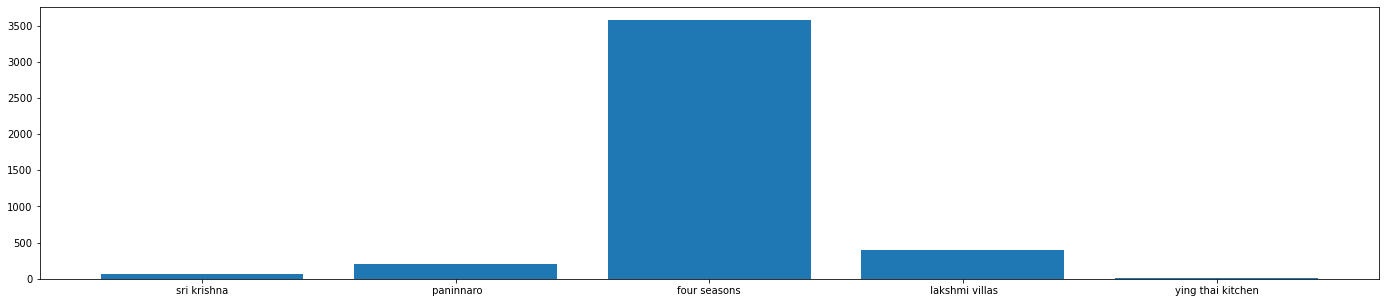

In [44]:
#since everything looks fine we will move to the next important step 
#DATA ANALYSIS
plt.figure(figsize=(24,5))
plt.bar(entertainment['organisation'],entertainment['amount'])

<AxesSubplot:title={'center':'entertainment expenditure'}, ylabel='organisation'>

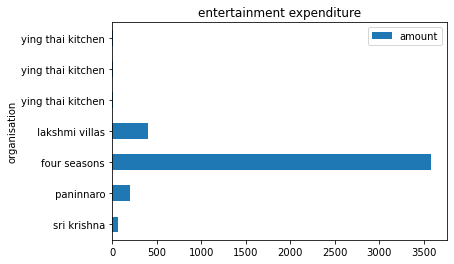

In [45]:
#lets make it more readble and analyzable
entertainment.plot(x='organisation',y='amount',kind='barh',title='entertainment expenditure')

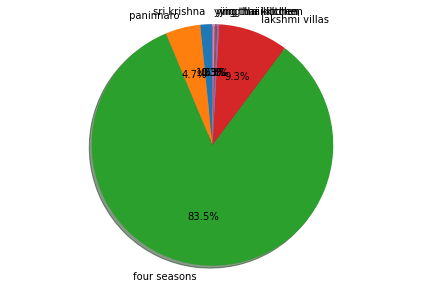

In [46]:
#its time to make pie chart
#here i will make pie chart using three ways just to see which one fits the best
labels=[]
for i in entertainment['organisation']:
    labels.append(i)  
amount=[]
for i in entertainment['amount']:
    amount.append(i)
plt.pie(amount, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')  
plt.tight_layout()
#entertainment.plot(x='organisation',y='amount',kind='barh',title='entertainment expenditure')
plt.show()

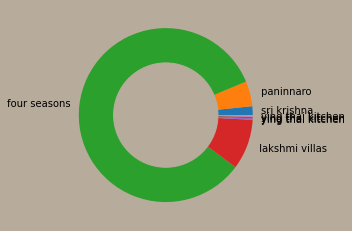

In [47]:
#yucks this plot is too messy
#lets try other way
#this is donut plot
# create a figure and set different background
fig = plt.figure()
fig.patch.set_facecolor('#B7AC9C')
# Change color of text and make a circle
plt.rcParams['text.color'] = 'black'
my_circle=plt.Circle( (0,0), 0.6,color='#B7AC9C' )
# Pieplot + circle on it
plt.pie(amount, labels=labels)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

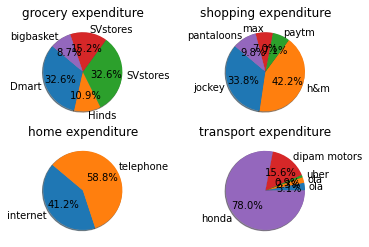

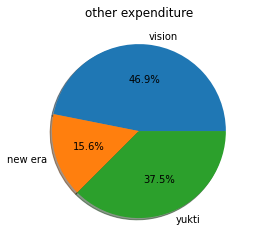

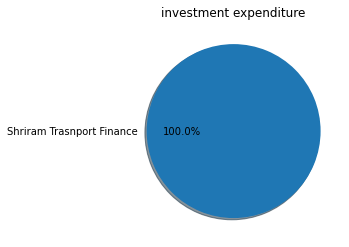

In [48]:
#this seems nice
#lets do this for other category as well
#similarly we will look at grocery and shopping
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#B7AC9C"]
plt.subplot(221)
plt.pie(grocery['amount'], labels=grocery['organisation'], 
autopct='%1.1f%%', shadow=True, startangle=140,)
plt.title("grocery expenditure")
plt.subplot(222)
plt.pie(shopping['amount'], labels=shopping['organisation'], 
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("shopping expenditure")
plt.subplot(223)
plt.pie(home['amount'], labels=home['organisation'], 
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("home expenditure")
plt.subplot(224)
plt.pie(transport['amount'], labels=transport['organisation'], 
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("transport expenditure")
#plt.legend(labels)
plt.show()
plt.pie(other['amount'], labels=other['organisation'], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("other expenditure")
plt.show()
plt.pie(investment['amount'], labels=investment['organisation'], autopct='%1.1f%%', shadow=True, startangle=0)
plt.title("investment expenditure")
plt.show()

In [49]:
#lets merge all the expenditure and save it to other csv
category=['entertainment','investment','shopping','grocery','transport','home','others']
#lets sum all the expenditure category wise
total_entertainment=entertainment['amount'].sum()
total_investment=investment['amount'].sum()
total_shopping=shopping['amount'].sum()
total_grocery=grocery['amount'].sum()
total_transport=transport['amount'].sum()
total_home=home['amount'].sum()
total_others=other['amount'].sum()
amount=[total_entertainment,total_investment,total_shopping,total_grocery,total_transport,total_home,total_others]

In [50]:
data={'category':category,'total':amount}

In [51]:
#here we created a new table which shows the total expenditure of all the category
df = pd.DataFrame(data) 

In [52]:
df.head(10)

,category,total
0,entertainment,4284.77
1,investment,25000.00
2,shopping,7107.00
3,grocery,4600.00
4,transport,6410.00
5,home,1700.00
6,others,3200.00


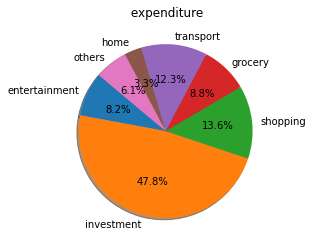

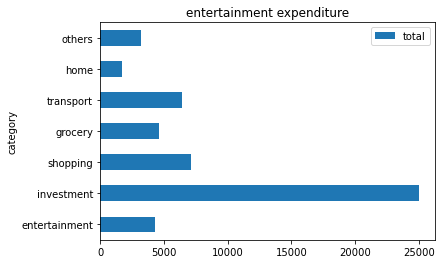

In [53]:
#lets plot a piechart and bar to analzye where we used 
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#B7AC9C"]

plt.pie(df['total'], labels=df['category'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(" expenditure")

df.plot(x='category',y='total',kind='barh',title='entertainment expenditure')
plt.show()

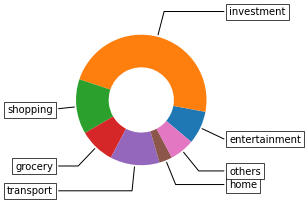

In [54]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(df['total'], wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(category[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()


<AxesSubplot:title={'center':'entertainment expenditure'}, ylabel='category'>

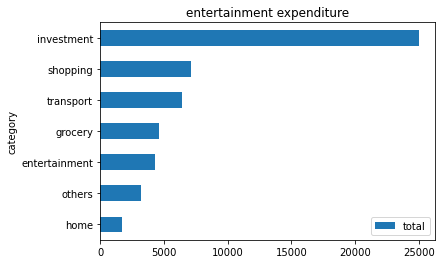

In [55]:
#wohooo we completed with the piechart
#nowlets move to last question
#lets make a inferance
ordered_df = df.sort_values(by='total')
data_sort=ordered_df

data_sort.plot(x='category',y='total',kind='barh',title='entertainment expenditure')

In [56]:
#this used to calculate the percentage  of every category
percent=[]
for i in df['total']:
    per=int((i/df['total'].sum())*100)
    percent.append(per)

percent.sort()

In [57]:
#question4
#from the above graph we can conclude that we have invested maximum money
#now lets see how much we have used in all category
for i in range(len(df)):
    print("{}%  of your expenditure in {} category".format(percent[i],data_sort['category'].iloc[i]))

3%  of your expenditure in home category
6%  of your expenditure in others category
8%  of your expenditure in entertainment category
8%  of your expenditure in grocery category
12%  of your expenditure in transport category
13%  of your expenditure in shopping category
47%  of your expenditure in investment category


conclusion:
Expense data provides detailed insights into entertainment expenditure such as, how much and how frequently the we went for movies and resturant.It is easier for us to cut down on these expenses.
as we can go once a month and we also need to take care of our health. the above Data analytics determined us where to find cost-saving opportunities, validate expenses, and point out the areas to invest more.The investment has maximum as it is necessary to invest for second source of income.The grocery expense detail is not completety true as  grocery vendors in india doesnot provide bill.the data for grocery used is of supermarket that we go sometimes.the transport category is less as i dont have petrol bills,and we have our own vehical.so we usually don't take taxi.to cut the transportation cost we can use city bus.
here are some money saving tips:
1)evaluate your spending
2)set a montly budget
3)track your spending,if it goes above the limits try to cut down  or spend less the next month in that category
4)plan out your meals for the week so that you can avoid randomly going out and spending unnesscerily
5)cut out cable.wifi is enough ,no need for tv.with services like Hulu, Netflix and Amazon Prime, you can now watch your favorite TV shows and movies for a fraction of the cost of cable TV.
